In [1]:
# Install the 'edgar' package to work with SEC Edgar data
pip install edgar

# Install the 'textblob' package for natural language processing tasks
pip install textblob

     ---------------------------------------- 3.8/3.8 MB 12.7 MB/s eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 14.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Import the 'Company' class from the 'edgar' package to work with SEC Edgar company data
from edgar import Company

# Import the 'TXTML' class from the 'edgar' package for handling and parsing TXTML documents
from edgar.txtml import TXTML

# Import the 'TextBlob' class from the 'textblob' package for natural language processing tasks
from textblob import TextBlob

In [13]:
# Import the required libraries
from edgar import Company, TXTML
from textblob import TextBlob
import csv

# List of companies and their CIK numbers
companies = {
    "American Express Co": "0000004962",
    "Amgen Inc": "0000318154",
    "Apple Inc": "0000320193",
    'Boeing Co': "0000012927",
    'Caterpillar Inc': "0000018230",
    'Cisco Systems Inc': "0000858877",
    'Chevron Corp': "0000093410",
    'Goldman Sachs Group Inc':"0000886982",
    'Home Depot Inc': "0000354950",
    'Honeywell International In': "0000773840",
    'International Business Machines Corp': "0000051143",
    'Intel Corp': "0000050863",
    'Johnson & Johnson': "0000200406",
    'Coca-Cola Co': "0000021344",
    'JPMorgan Chase & Co': "0000019617",
    'McDonald’s Corp': "0000063908",
    '3M Co': "0000066740",
    'Merck & Co Inc': "0000310158",
    'Microsoft Corp': "0000789019",
    'Nike Inc': "0000320187",
    'Procter & Gamble Co': "0000080424",
    'Travelers Companies Inc': "0000086312",
    'UnitedHealth Group Inc': "0000731766",
    'Salesforce Inc': "0001108524",
    'Verizon Communications Inc': "0000732712",
    'Visa Inc': "0001403161",
    'Walgreens Boots Alliance Inc': "0001618921",
    'Walmart Inc': "0000104169",
    'Walt Disney Co': "0001001039",
    'Dow Inc': "0001751788"}

# Open a CSV file for writing
with open('D:\Output\sentiment_scores_maxminvariance.csv', 'w', newline='') as csvfile:
    # Initialize a CSV writer
    fieldnames = ['Company', 'Average_Score', 'Highest_Score', 'Lowest_Score', 'Variance_Score', 'Num_No_Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Iterate over each company in the dictionary
    for company_name, cik in companies.items():
        # Create an instance of the 'Company' class for each company
        company = Company(company_name, cik)

        # Retrieve all 10-K filings for the specified company
        tree = company.get_all_filings(filing_type = "10-K")

        # Extract the content of the 20 most recent 10-K filings from the retrieved data
        docs = company.get_documents(tree, no_of_documents=20)

        # Initialize an empty list to store sentiment scores
        sentiment_scores = []

        # Loop over each document in the 'docs' list
        for i, document in enumerate(docs):
            # Check if the document text is not None
            if document.text is not None:
                # Write the document content to a text file
                with open(f"{company_name}_document_{i}.txt", "w") as f:
                    f.write(document.text)

                # Extract the text content from the current document, removing any HTML or XBRL tags
                text = TXTML.parse_full_10K(document)

                # Create a 'TextBlob' object from the extracted text
                blob = TextBlob(text)

                # Calculate the polarity score of the text and append it to the sentiment_scores list
                sentiment_scores.append(blob.sentiment.polarity)

        # Remove sentiment scores of 0
        filtered_scores = [score for score in sentiment_scores if score != 0]

        # Check if filtered_scores is not empty
        if filtered_scores:
            # Calculate the average sentiment score
            average_score = sum(filtered_scores) / len(filtered_scores)

            # Determine the highest and lowest sentiment scores
            highest_score = max(filtered_scores)
            lowest_score = min(filtered_scores)

            # Calculate the variance of the sentiment scores
            variance_score = sum((i - average_score) ** 2 for i in filtered_scores) / len(filtered_scores)
        else:
            # Set all scores as None if filtered_scores is empty
            average_score, highest_score, lowest_score, variance_score = None, None, None, None

        # Count the number of documents with no sentiment score
        num_no_score = sentiment_scores.count(0)


        # Write the results to the CSV file
        writer.writerow({
            'Company': company_name,
            'Average_Score': average_score,
            'Highest_Score': highest_score,
            'Lowest_Score': lowest_score,
            'Variance_Score': variance_score,
            'Num_No_Score': num_no_score})

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
df = pd.read_csv('D:\\Output\\sentiment_scores_maxminvariance.csv', encoding='ISO-8859-1')

C:\Users\Sumit Mehta\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


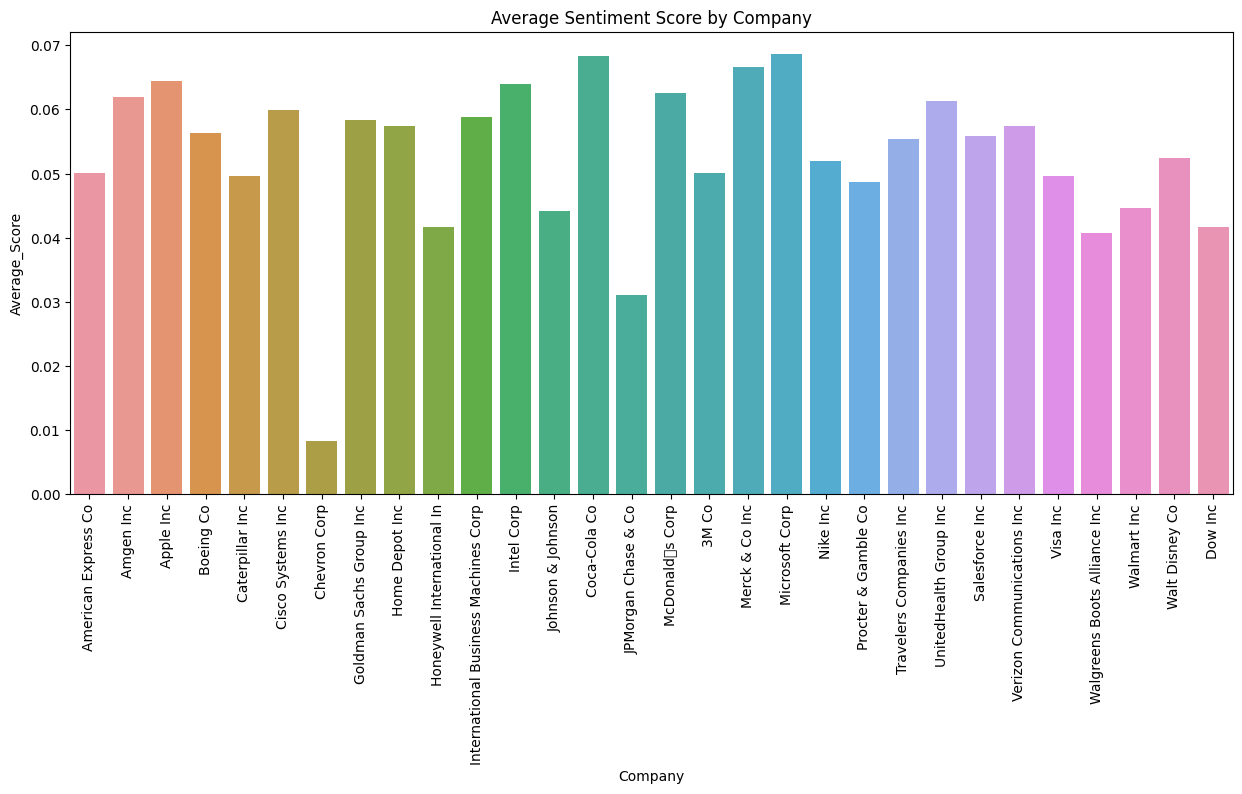

In [17]:
# Create a new figure with specified dimensions (15 units wide by 6 units tall)
plt.figure(figsize=(15, 6))

# Create a bar plot using Seaborn. The x-axis represents companies, and the y-axis represents their average sentiment scores.
# The data is sourced from a DataFrame named 'df'.
sns.barplot(x='Company', y='Average_Score', data=df)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add a title to the plot
plt.title('Average Sentiment Score by Company')

# Display the plot
plt.show()

C:\Users\Sumit Mehta\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


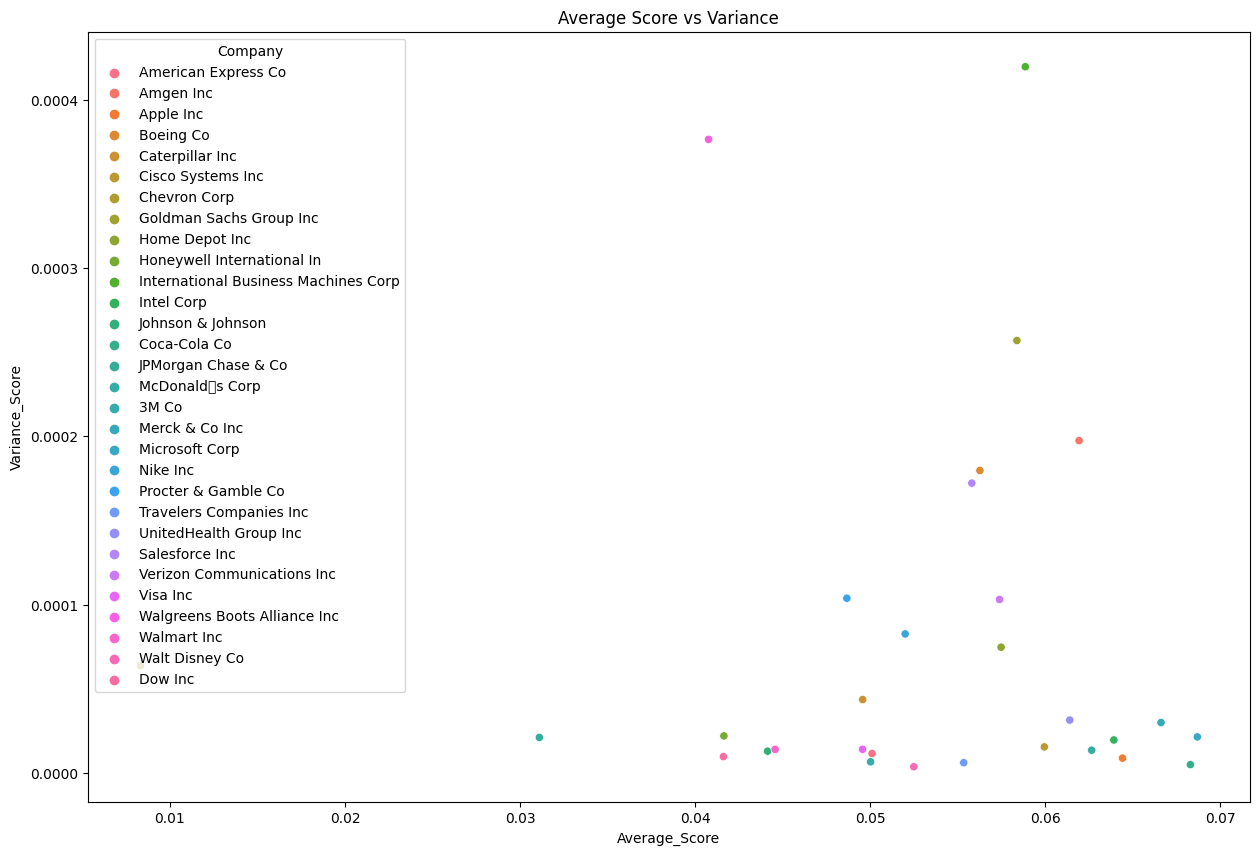

In [26]:
# Create a new figure with specified dimensions (15 units wide by 10 units tall)
plt.figure(figsize=(15, 10))

# Create a scatter plot using Seaborn. The x-axis represents the average sentiment scores,
# the y-axis represents the variance in sentiment scores, and different companies are color-coded.
# The data is sourced from a DataFrame named 'df'.
sns.scatterplot(x='Average_Score', y='Variance_Score', hue='Company', data=df)

# Add a title to the plot
plt.title('Average Score vs Variance')

# Display the plot
plt.show()

In [27]:
import pandas as pd
import csv
from edgar import Company, TXTML
from textblob import TextBlob

# List of companies and their CIK numbers
companies = {
    "American Express Co": "0000004962",
    "Amgen Inc": "0000318154",
    "Apple Inc": "0000320193",
    'Boeing Co': "0000012927",
    'Caterpillar Inc': "0000018230",
    'Cisco Systems Inc': "0000858877",
    'Chevron Corp': "0000093410",
    'Goldman Sachs Group Inc':"0000886982",
    'Home Depot Inc': "0000354950",
    'Honeywell International In': "0000773840",
    'International Business Machines Corp': "0000051143",
    'Intel Corp': "0000050863",
    'Johnson & Johnson': "0000200406",
    'Coca-Cola Co': "0000021344",
    'JPMorgan Chase & Co': "0000019617",
    'McDonald’s Corp': "0000063908",
    '3M Co': "0000066740",
    'Merck & Co Inc': "0000310158",
    'Microsoft Corp': "0000789019",
    'Nike Inc': "0000320187",
    'Procter & Gamble Co': "0000080424",
    'Travelers Companies Inc': "0000086312",
    'UnitedHealth Group Inc': "0000731766",
    'Salesforce Inc': "0001108524",
    'Verizon Communications Inc': "0000732712",
    'Visa Inc': "0001403161",
    'Walgreens Boots Alliance Inc': "0001618921",
    'Walmart Inc': "0000104169",
    'Walt Disney Co': "0001001039",
    'Dow Inc': "0001751788"}

# Create an empty dictionary to store the sentiment scores
sentiment_scores = {}

# Iterate over each company in the dictionary
for company_name, cik in companies.items():
    # Create an instance of the 'Company' class for each company
    company = Company(company_name, cik)

    # Retrieve all 10-K filings for the specified company
    tree = company.get_all_filings(filing_type="10-K")

    # Extract the content of the 20 most recent 10-K filings from the retrieved data
    docs = company.get_documents(tree, no_of_documents=20)

    # Loop over each document in the 'docs' list
    for i, document in enumerate(docs):
        # Check if the document text is not None
        if document.text is not None:
            # Extract the filing date from the document content
            filing_date = document.text.split(" : ")[-1][:4]  # Extracting the first 4 characters as the year

            # Write the document content to a text file
            with open(f"{company_name}_document_{i}.txt", "w") as f:
                f.write(document.text)

            # Extract the text content from the current document, removing any HTML or XBRL tags
            text = TXTML.parse_full_10K(document)

            # Create a 'TextBlob' object from the extracted text
            blob = TextBlob(text)

            # Calculate the polarity score of the text
            sentiment_score = blob.sentiment.polarity

            # Add the sentiment score to the dictionary, grouped by company and year
            if (company_name, filing_date) not in sentiment_scores:
                sentiment_scores[(company_name, filing_date)] = []
            sentiment_scores[(company_name, filing_date)].append(sentiment_score)

# Open a CSV file for writing
with open('D:\Output\sentiment_scores_trend.csv', 'w', newline='') as csvfile:
    # Initialize a CSV writer
    fieldnames = ['Company', 'Year', 'Average_Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Iterate over the sentiment scores dictionary
    for (company_name, filing_date), scores in sentiment_scores.items():
        # Calculate the average sentiment score for the company and year
        average_score = sum(scores) / len(scores)

        # Write the results to the CSV file
        writer.writerow({
            'Company': company_name,
            'Year': filing_date,
            'Average_Score': average_score})

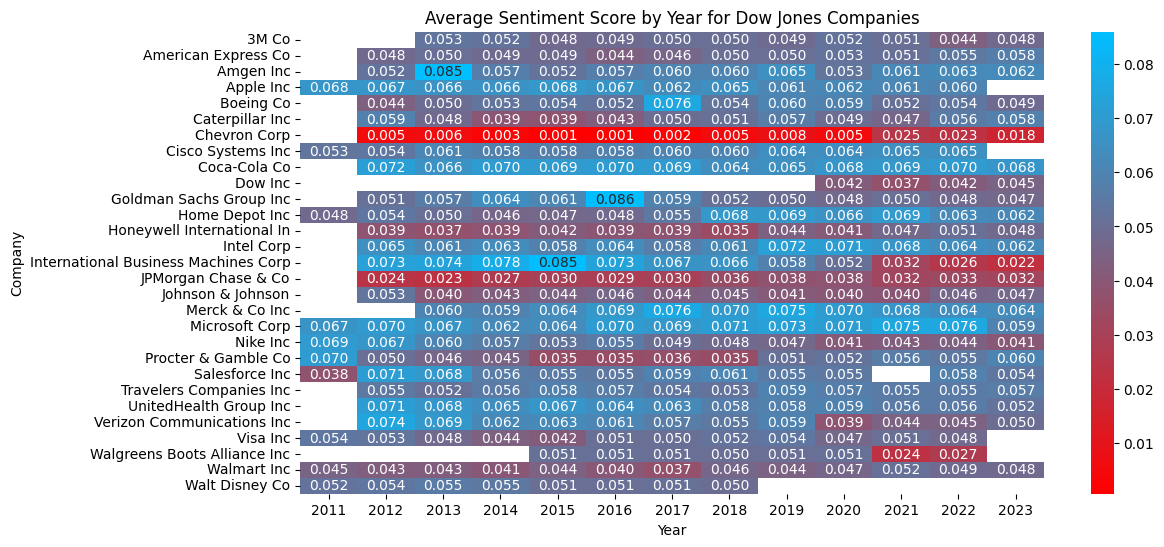

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Create a custom colormap
colors = [(1, 0, 0), (0, 0.745, 1)]  # Red to Custom Blue
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'custom_light_blue'
colormap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Load the sentiment scores data from the CSV file
df = pd.read_csv('D:\\Output\\sentiment_scores_trend.csv', encoding='ISO-8859-1')

# Filter the data for Dow Jones companies
dow_companies = ["American Express Co", "Amgen Inc", "Apple Inc", "Boeing Co", "Caterpillar Inc", "Cisco Systems Inc","Chevron Corp", "Goldman Sachs Group Inc", "Home Depot Inc", "Honeywell International In",
                 "International Business Machines Corp", "Intel Corp", "Johnson & Johnson", "Coca-Cola Co", "JPMorgan Chase & Co", "McDonald’s Corp", "3M Co", "Merck & Co Inc", "Microsoft Corp", "Nike Inc",
                 "Procter & Gamble Co","Travelers Companies Inc", "UnitedHealth Group Inc","Salesforce Inc","Verizon Communications Inc", "Visa Inc", "Walgreens Boots Alliance Inc", "Walmart Inc", "Walt Disney Co", "Dow Inc"]

df_dow = df[df['Company'].isin(dow_companies)]

# Group the data by year and company and calculate average sentiment score
df_avg_sentiment = df_dow.groupby(['Year', 'Company'], as_index=False)['Average_Score'].mean()

# Exclude specific years, for example, 2020
df_avg_sentiment = df_avg_sentiment[df_avg_sentiment['Year'] != "----"]

# Pivot the data to have years as columns and companies as rows
df_pivot = df_avg_sentiment.pivot(index='Company', columns='Year', values='Average_Score')

# Plot the sentiment scores for each company over time
plt.figure(figsize=(12, 6))
sns.heatmap(data=df_pivot, cmap=colormap, annot=True, fmt=".3f", cbar=True)
plt.xlabel('Year')
plt.ylabel('Company')
plt.title('Average Sentiment Score by Year for Dow Jones Companies')
plt.show()


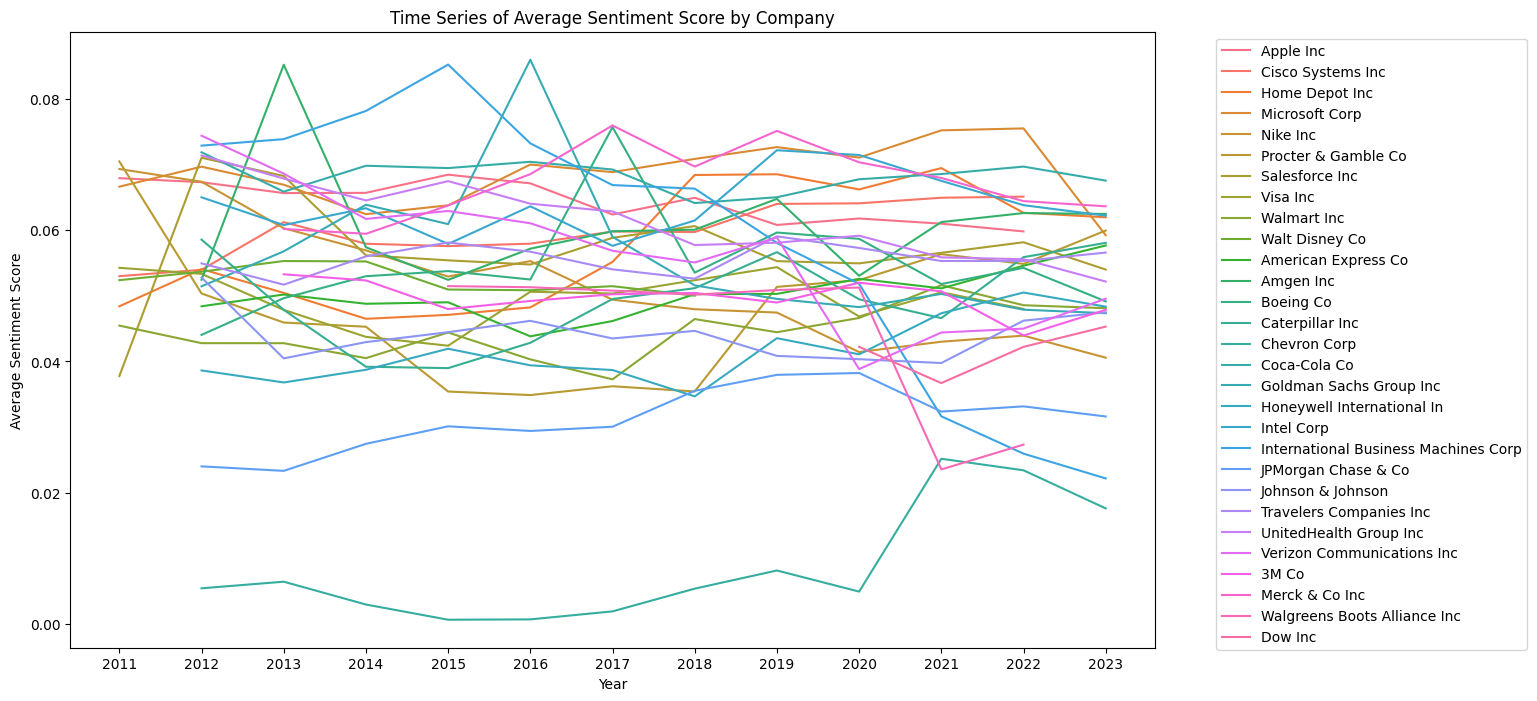

In [36]:
# Create a new figure with specified dimensions (15 units wide by 10 units tall)
plt.figure(figsize=(15, 10))

# Create a scatter plot using Seaborn. The x-axis represents the average sentiment scores,
# the y-axis represents the variance in sentiment scores, and different companies are color-coded.
# The data is sourced from a DataFrame named 'df'.
sns.scatterplot(x='Average_Score', y='Variance_Score', hue='Company', data=df)

# Add a title to the plot
plt.title('Average Score vs Variance')

# Display the plot
plt.show()

In [37]:
sectors = {
    'Technology': ['Apple Inc.', 'Cisco Systems Inc.', 'International Business Machines Corp', 'Intel Corp.', 'Microsoft Corp.', 'Salesforce Inc.'],
    'Financial Services': ['American Express Co.', 'Goldman Sachs Group Inc.', 'JPMorgan Chase & Co.', 'Visa Inc.'],
    'Health Care': ['Amgen Inc.', 'Johnson & Johnson', 'Merck & Co Inc.', 'UnitedHealth Group Inc.', 'Walgreens Boots Alliance Inc.'],
    'Consumer Goods': ['Coca-Cola Co.', 'McDonald’s Corp.', 'Nike Inc.', 'Procter & Gamble Co.', 'Walmart Inc.'],
    'Retail': ['Home Depot Inc.'],
    'Industrial': ['3M Co.', 'Boeing Co.', 'Caterpillar Inc.', 'Honeywell International Inc.'],
    'Energy': ['Chevron Corp.', 'Dow Inc.'],
    'Telecommunications': ['Verizon Communications Inc.'],
    'Insurance': ['Travelers Companies Inc.'],
    'Entertainment and Media': ['Walt Disney Co.']
}

In [39]:
sectors = {
    'Technology': ['Apple Inc', 'Cisco Systems Inc', 'International Business Machines Corp', 'Intel Corp', 'Microsoft Corp', 'Salesforce Inc'],
    'Financial Services': ['American Express Co', 'Goldman Sachs Group Inc', 'JPMorgan Chase & Co', 'Visa Inc'],
    'Health Care': ['Amgen Inc', 'Johnson & Johnson', 'Merck & Co Inc', 'UnitedHealth Group Inc', 'Walgreens Boots Alliance Inc'],
    'Consumer Goods': ['Coca-Cola Co', 'McDonald’s Corp', 'Nike Inc', 'Procter & Gamble Co', 'Walmart Inc'],
    'Retail': ['Home Depot Inc'],
    'Industrial': ['3M Co', 'Boeing Co', 'Caterpillar Inc', 'Honeywell International In'],
    'Energy': ['Chevron Corp', 'Dow Inc'],
    'Telecommunications': ['Verizon Communications Inc'],
    'Insurance': ['Travelers Companies Inc'],
    'Entertainment and Media': ['Walt Disney Co']
}

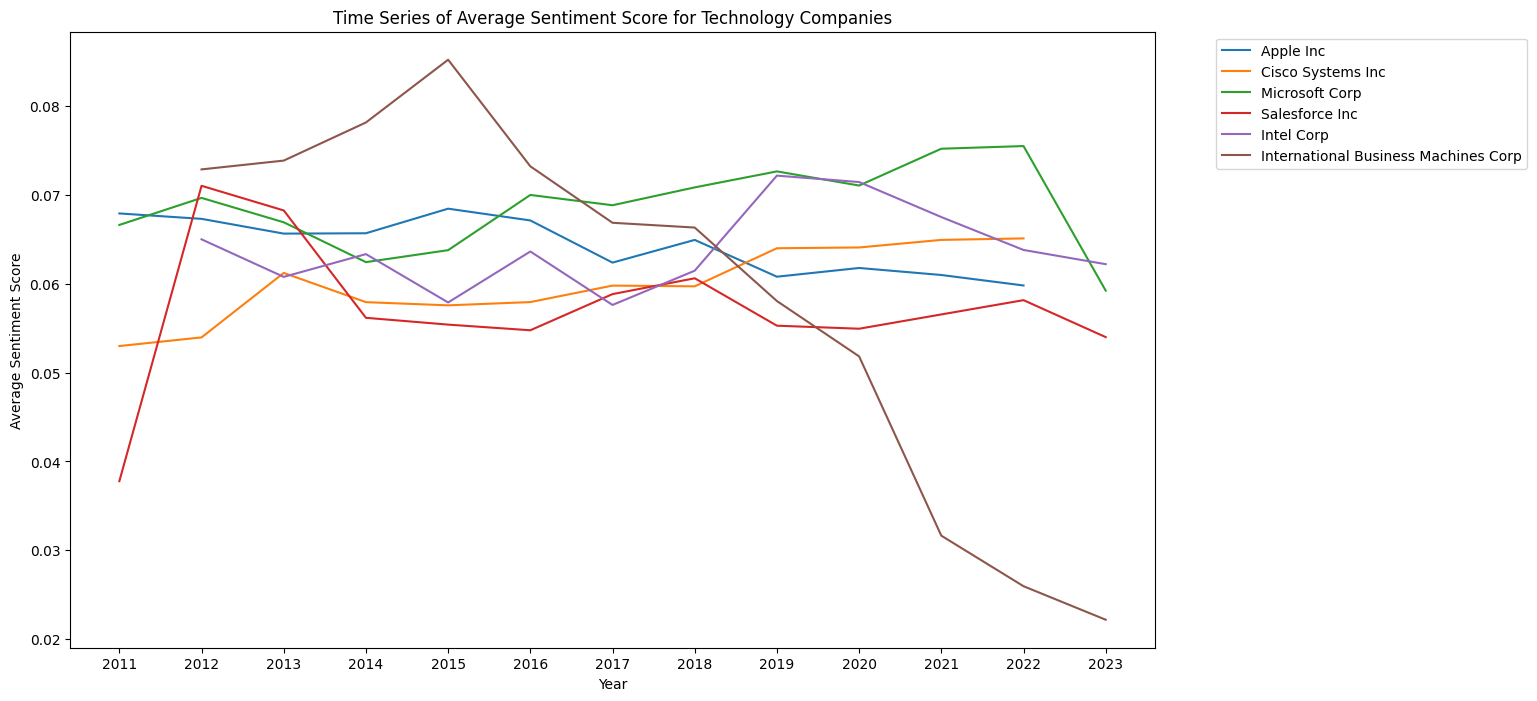

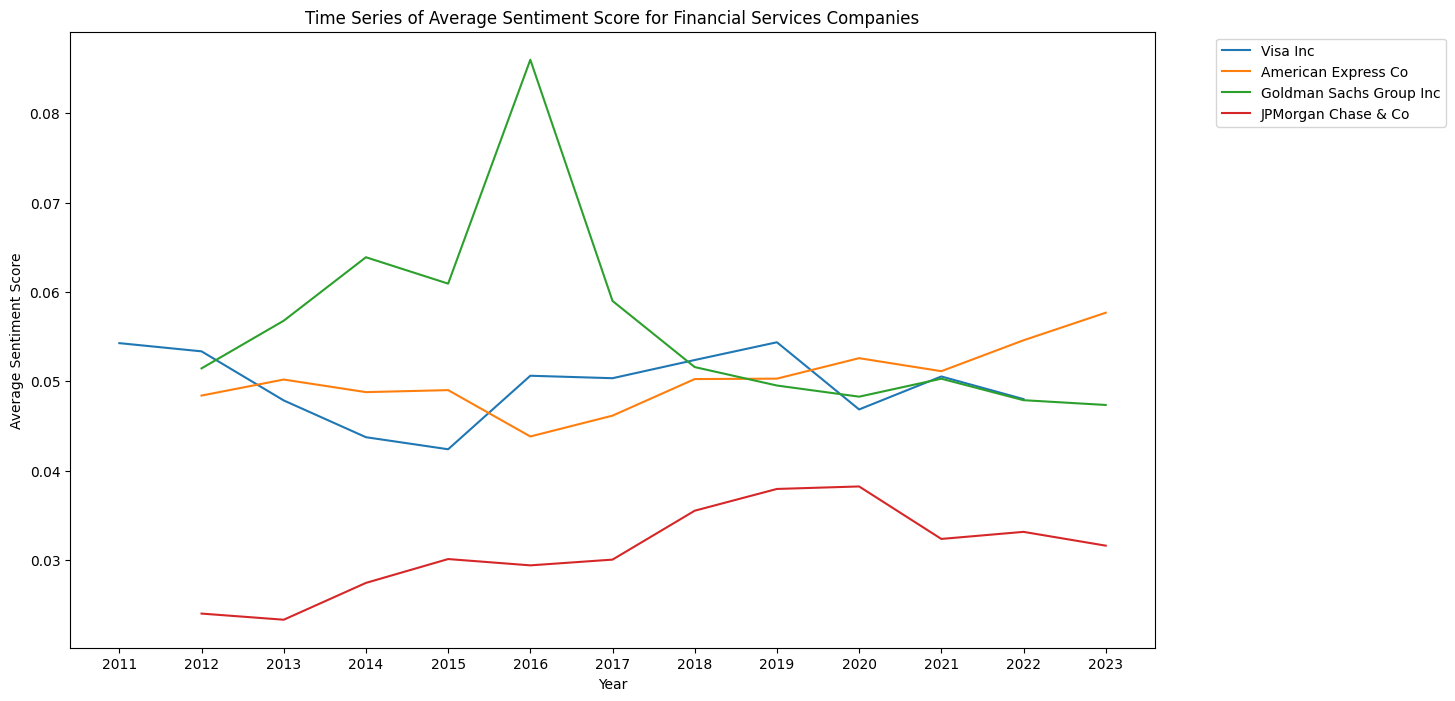

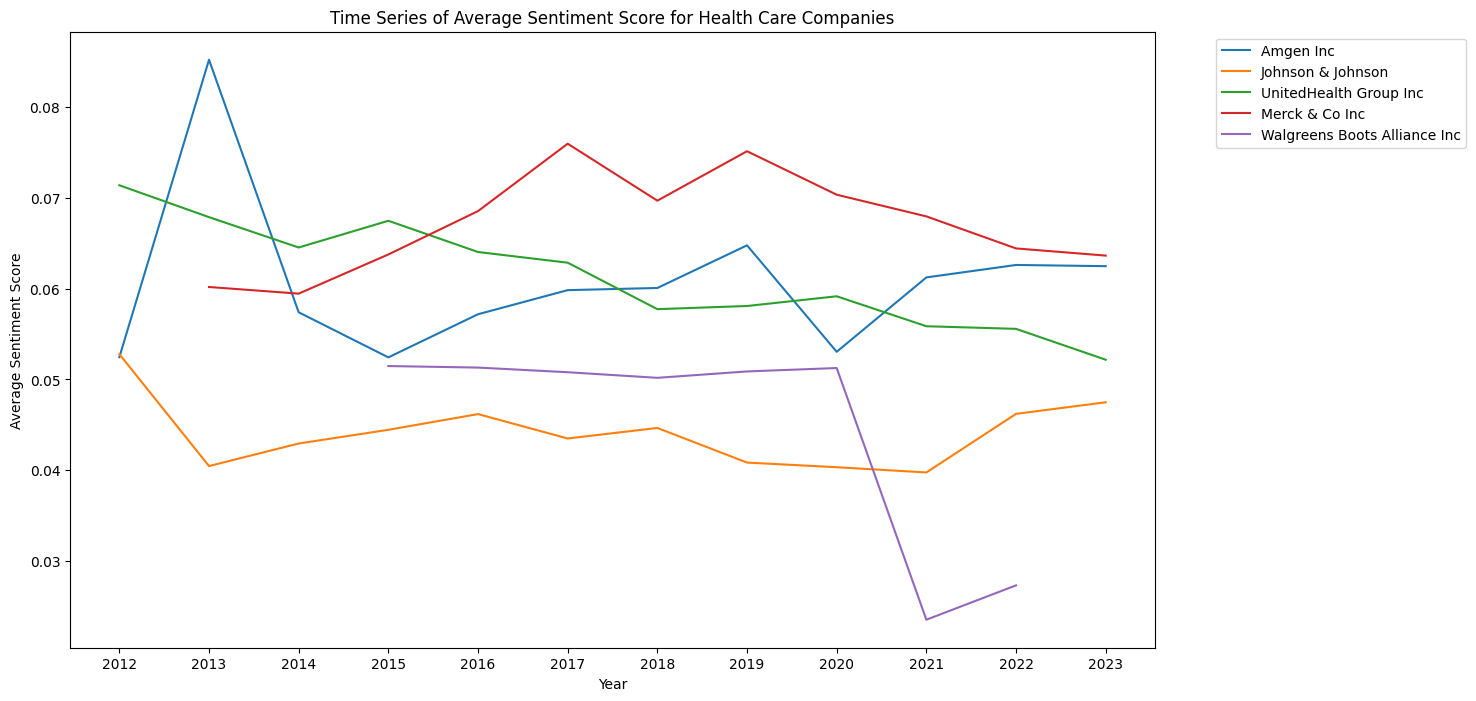

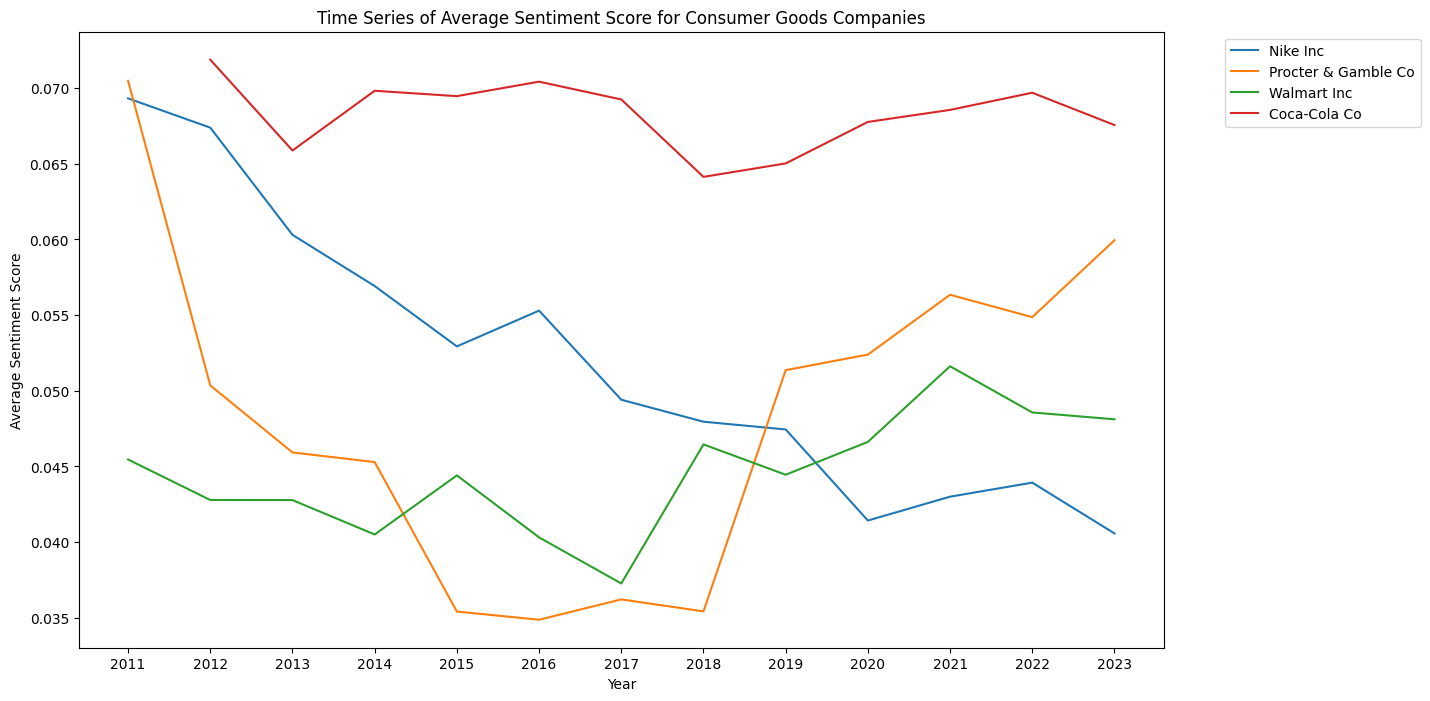

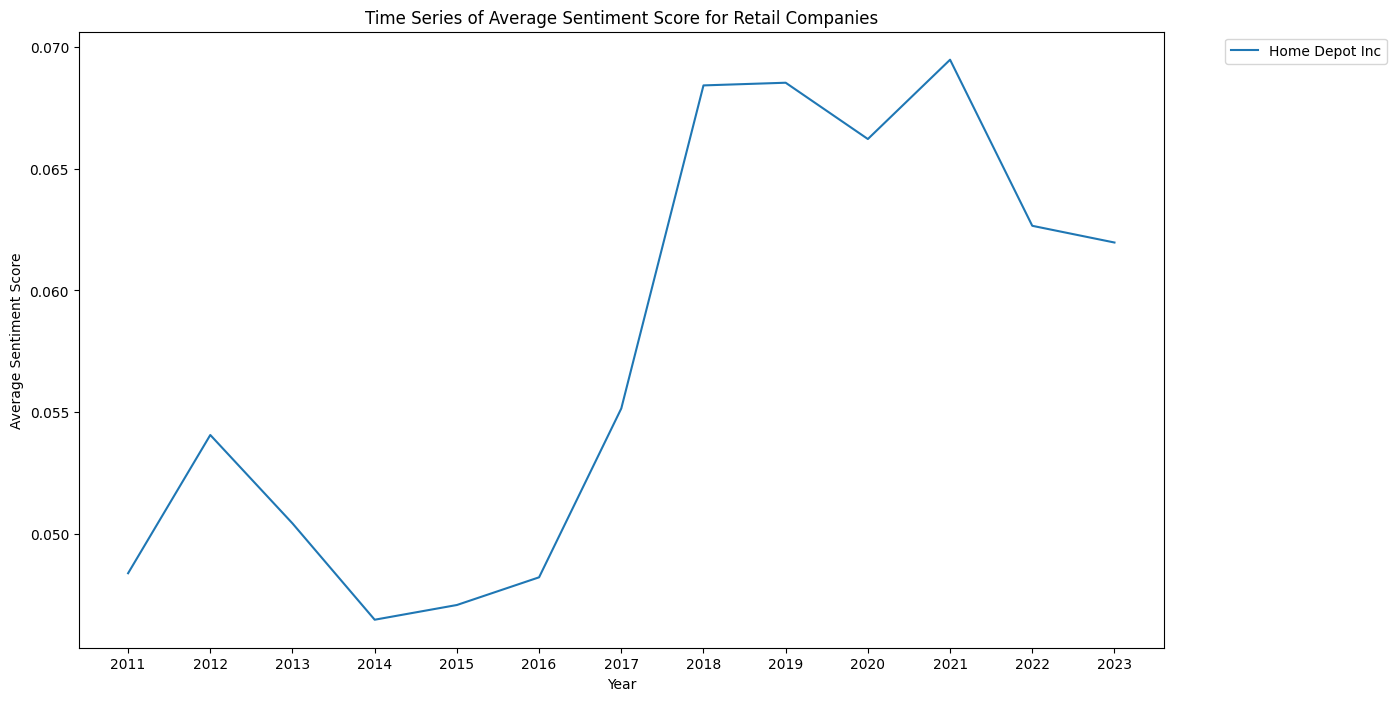

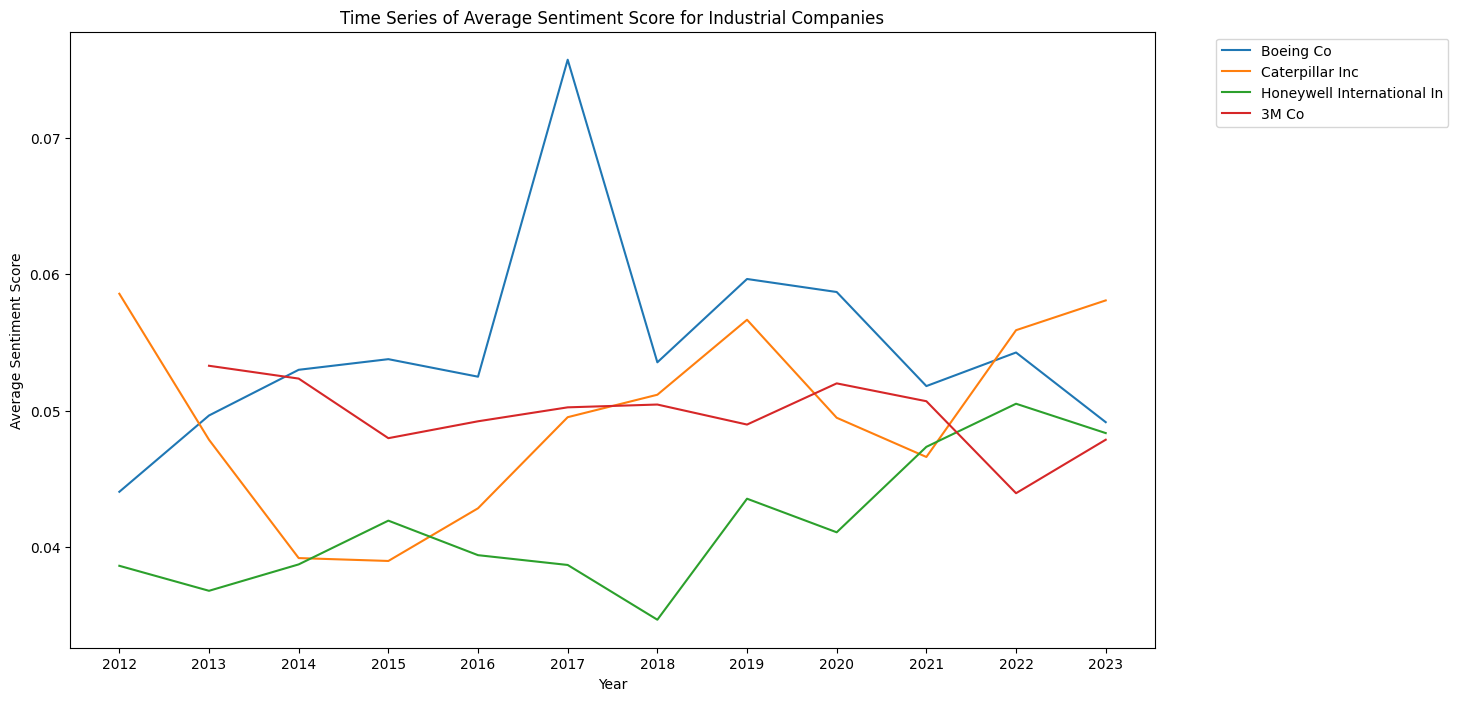

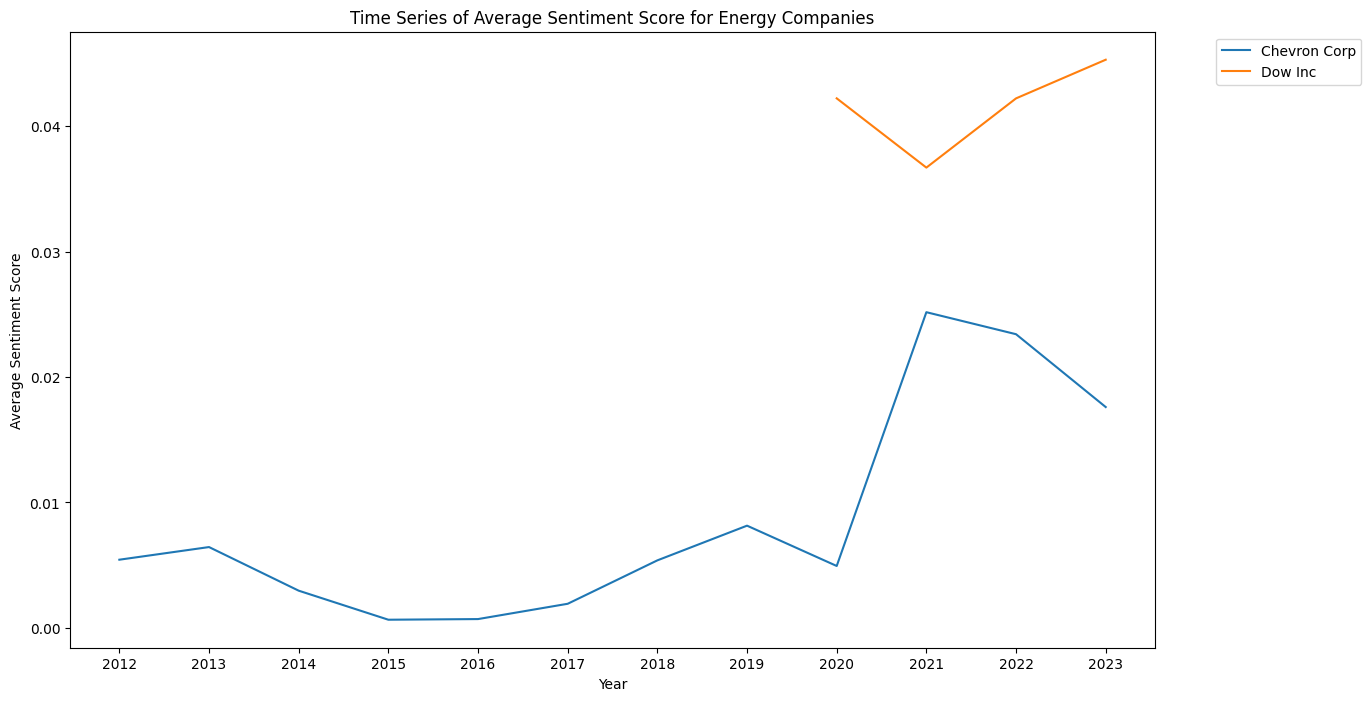

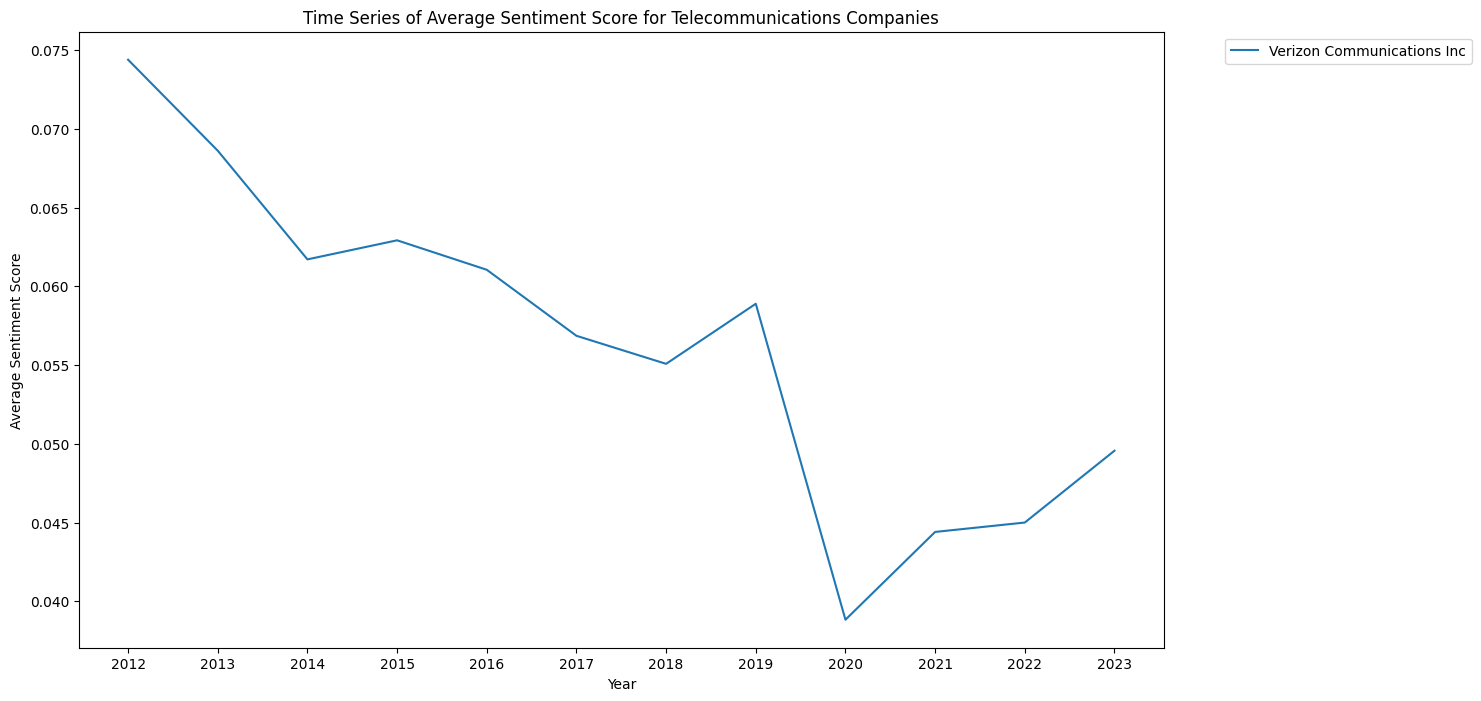

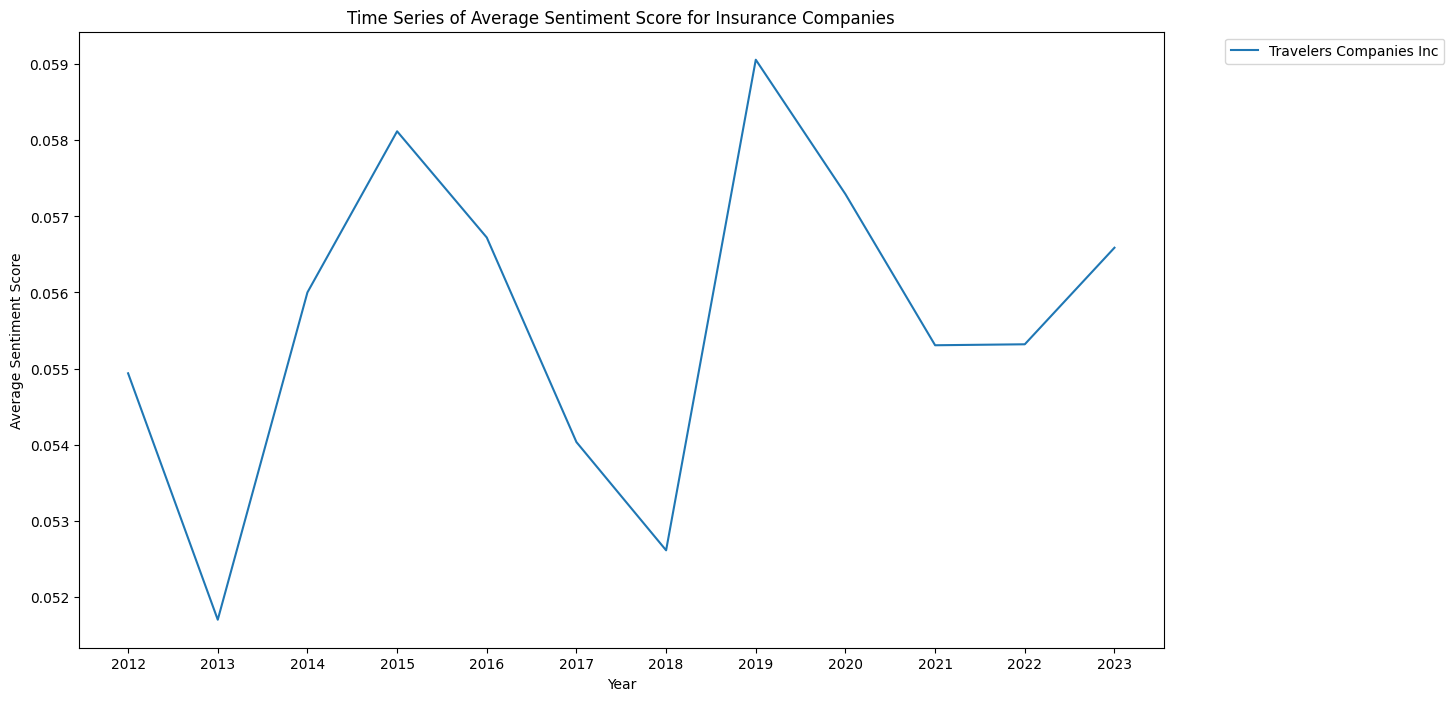

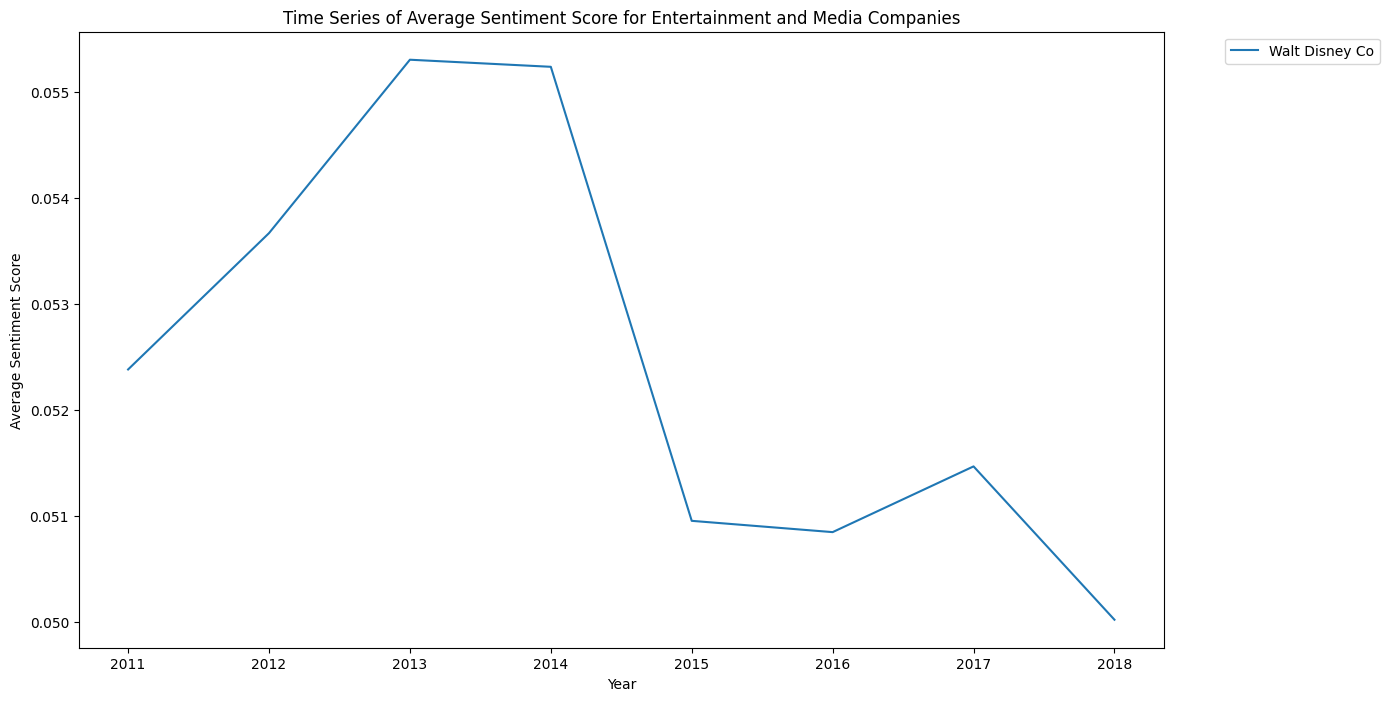

In [40]:
# Loop through each sector and its associated companies from the 'sectors' dictionary
for sector, companies in sectors.items():
    
    # Filter the dataframe 'df_avg_sentiment' to only include rows where the 'Company' column matches one of the companies in the current sector
    df_sector = df_avg_sentiment[df_avg_sentiment['Company'].isin(companies)]
    
    # Initialize a new figure with specified dimensions for plotting
    plt.figure(figsize=(14, 8))
    
    # Create a line plot using Seaborn. The x-axis represents 'Year', the y-axis represents 'Average_Score', and different lines (hues) represent different companies
    sns.lineplot(x='Year', y='Average_Score', hue='Company', data=df_sector)
    
    # Set the title of the plot to indicate which sector's companies are being visualized
    plt.title(f'Time Series of Average Sentiment Score for {sector} Companies')
    
    # Label the x-axis as 'Year'
    plt.xlabel('Year')
    
    # Label the y-axis as 'Average Sentiment Score'
    plt.ylabel('Average Sentiment Score')
    
    # Position the legend outside the plot on the upper left side
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Display the plot
    plt.show()

Text(0.5, 1.0, 'Distribution of Average Sentiment Scores by Sector')

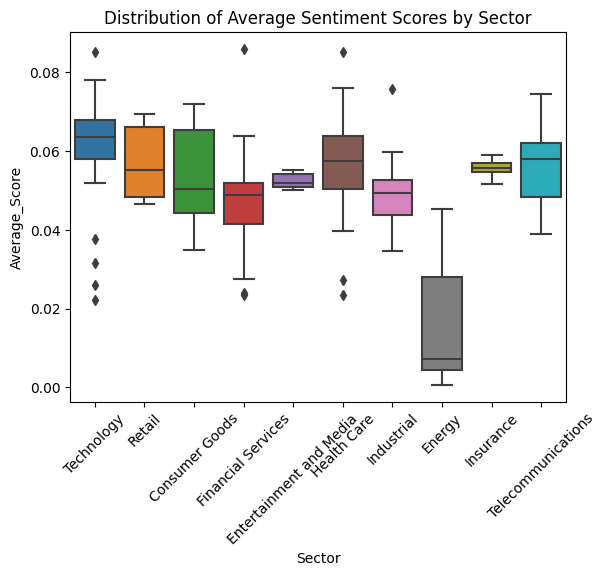

In [41]:
# Create a new 'Sector' column in the 'df_avg_sentiment' dataframe.
# This is done by mapping each company in the 'Company' column to its respective sector.
# The mapping is constructed using a dictionary comprehension that iterates over the 'sectors' dictionary.
df_avg_sentiment['Sector'] = df_avg_sentiment['Company'].map({company: sector for sector, companies in sectors.items() for company in companies})

# Create a boxplot using Seaborn to visualize the distribution of 'Average_Score' for each sector.
# The x-axis represents different sectors and the y-axis represents the 'Average_Score'.
sns.boxplot(x='Sector', y='Average_Score', data=df_avg_sentiment)

# Rotate the x-axis labels (sector names) by 45 degrees for better readability.
plt.xticks(rotation=45)

# Set the title of the plot to indicate the distribution of average sentiment scores by sector.
plt.title('Distribution of Average Sentiment Scores by Sector')

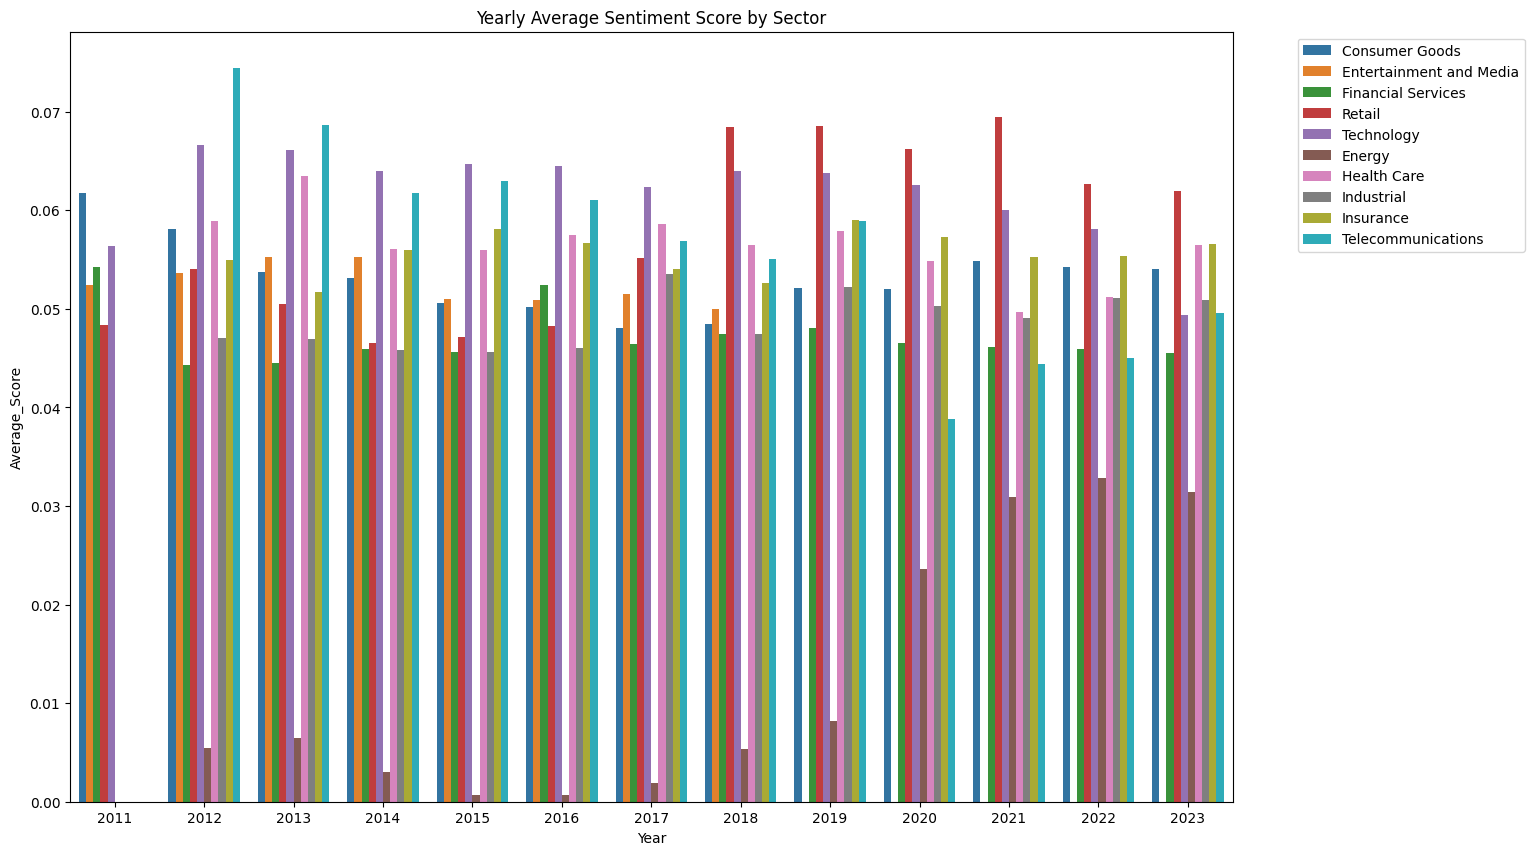

In [53]:
# Initialize a new figure with specified dimensions (15 units wide by 10 units tall) for plotting
plt.figure(figsize=(15, 10))

# Create a bar plot using Seaborn.
# The x-axis represents 'Year', the y-axis represents 'Average_Score', and different colored bars (hues) represent different sectors.
# The data for this plot is sourced from the 'df_avg_sentiment_by_sector' dataframe.
sns.barplot(x='Year', y='Average_Score', hue='Sector', data=df_avg_sentiment_by_sector)

# Set the title of the plot to indicate the yearly average sentiment scores grouped by sector.
plt.title('Yearly Average Sentiment Score by Sector')

# Position the legend outside the plot on the upper left side.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot.
plt.show()

Text(0.5, 1.0, 'Histogram of Average Sentiment Scores')

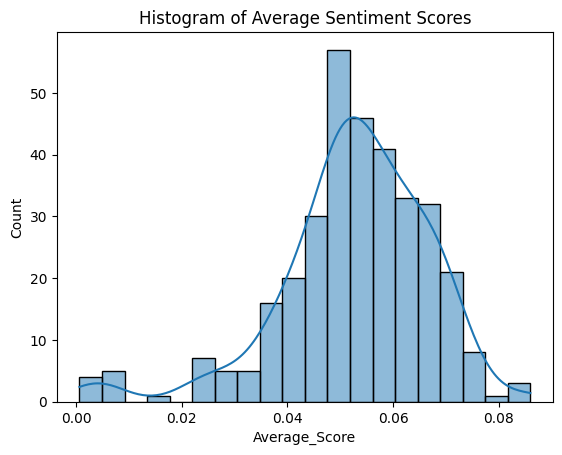

In [47]:
# Create a histogram using Seaborn's histplot function.
# The data for this plot is sourced from the 'Average_Score' column of the 'df_avg_sentiment' dataframe.
# The 'bins' parameter specifies that the data should be divided into 20 bins.
# The 'kde' parameter set to True means that a Kernel Density Estimate (KDE) will be plotted on top of the histogram.
sns.histplot(df_avg_sentiment['Average_Score'], bins=20, kde=True)

# Set the title of the plot to indicate it's a histogram of average sentiment scores.
plt.title('Histogram of Average Sentiment Scores')

In [2]:
import pandas as pd

In [59]:
df_final = pd.read_csv("D:\Dissertation\Viraj Waykar\AccountingRatio.csv")
market_ratio = pd.read_excel("D:\Dissertation\Viraj Waykar\MarketRatio.xlsx")

In [4]:
df_final.info()
market_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     330 non-null    int64  
 1   Company Name                   330 non-null    object 
 2   Year                           330 non-null    int64  
 3   Return On Assets               330 non-null    float64
 4   Return On Equity               330 non-null    float64
 5   Gross Profit Margin            330 non-null    float64
 6   Operating Margin               330 non-null    float64
 7   Net Profit Margin              330 non-null    float64
 8   Current Ratio                  330 non-null    float64
 9   Quick Ratio                    330 non-null    float64
 10  Asset Turnover                 330 non-null    float64
 11  Accounts Receivable Turnover   330 non-null    float64
 12  Debt to Equity                 330 non-null    flo

In [60]:
merged_df = pd.merge(df_final, market_ratio, on='Year', how='inner')

In [47]:
merged_df

,Unnamed: 0,Company Name,Year,Return On Assets,Return On Equity,Gross Profit Margin,Operating Margin,Net Profit Margin,Current Ratio,Quick Ratio,...,Accounts Receivable Turnover,Debt to Equity,Price / EPS,Earnings Per Share,Price to Book Value per Share,Average_Score,Inflation rate,GDP growth rate,Unemplyment rate,10-year treasury rate
0,0,Honeywell International Inc,2012,0.08690,0.29840,0.24887,0.110288,0.077685,1.34902,1.02438,...,5.158176,0.573747,NaN,4.47192,3.645418,0.038629,0.0207,0.0228,0.0807,0.0180
1,11,American Express Co,2012,0.03320,0.22800,0.00000,0.251335,0.138380,0.00000,0.00000,...,0.000000,3.326220,0.000000,4.37407,3.363094,0.048404,0.0207,0.0228,0.0807,0.0180
2,22,Amgen Inc,2012,0.09920,0.26880,0.84160,0.336867,0.251665,3.81016,3.47516,...,6.377909,1.391868,0.000000,6.59296,3.420412,0.052451,0.0207,0.0228,0.0807,0.0180
3,33,Apple Inc,2012,0.28540,0.42840,0.43870,0.352960,0.266651,1.49585,1.47533,...,10.293532,0.000000,0.000000,1.74280,5.300205,0.067313,0.0207,0.0228,0.0807,0.0180
4,44,Verizon Communications Inc,2012,0.02900,0.19130,0.60060,0.181327,0.007553,0.78777,0.74789,...,9.514290,0.607800,0.000000,2.44610,0.000000,0.074392,0.0207,0.0228,0.0807,0.0180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,285,Goldman Sachs Group Inc,2022,0.00740,0.10200,0.00000,0.226754,0.156656,0.00000,0.00000,...,0.000000,3.951915,10.268722,33.68850,1.079995,0.047887,0.0800,0.0206,0.0361,0.0295
326,296,Salesforce Inc,2022,0.05379,0.08669,0.78230,0.059263,0.006634,1.01947,0.00000,...,2.643062,0.195206,26.865914,4.93180,2.904123,0.058159,0.0800,0.0206,0.0361,0.0295
327,307,Visa Inc,2022,0.19039,0.43829,0.97460,0.675879,0.499147,1.44847,0.00000,...,7.634801,0.630955,25.015171,8.27467,11.049083,0.048009,0.0800,0.0206,0.0361,0.0295
328,318,Merck & Co Inc,2022,0.17690,0.45159,0.74450,0.342611,0.244910,1.47374,1.22988,...,6.130610,0.666355,14.998858,7.38600,6.122343,0.064427,0.0800,0.0206,0.0361,0.0295


In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     330 non-null    int64  
 1   Company Name                   330 non-null    object 
 2   Year                           330 non-null    int64  
 3   Return On Assets               330 non-null    float64
 4   Return On Equity               330 non-null    float64
 5   Gross Profit Margin            330 non-null    float64
 6   Operating Margin               330 non-null    float64
 7   Net Profit Margin              330 non-null    float64
 8   Current Ratio                  330 non-null    float64
 9   Quick Ratio                    330 non-null    float64
 10  Asset Turnover                 330 non-null    float64
 11  Accounts Receivable Turnover   330 non-null    float64
 12  Debt to Equity                 330 non-null    flo

# Data Cleaning and Preparation

In [61]:
# Drop the unwanted columns
merged_df = merged_df.drop(columns=['Unnamed: 0', 'Asset Turnover'])

In [62]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [63]:
merged_df.columns = merged_df.columns.str.strip()

In [64]:
merged_df.shape

(330, 19)

In [65]:
# Step 2: Handle Missing Values
merged_df['Price / EPS'].fillna(merged_df['Price / EPS'].mean(), inplace=True)
merged_df['Average_Score'].fillna(merged_df['Average_Score'].mean(), inplace=True)

In [66]:
merged_df = merged_df.drop("Company Name", axis=1)

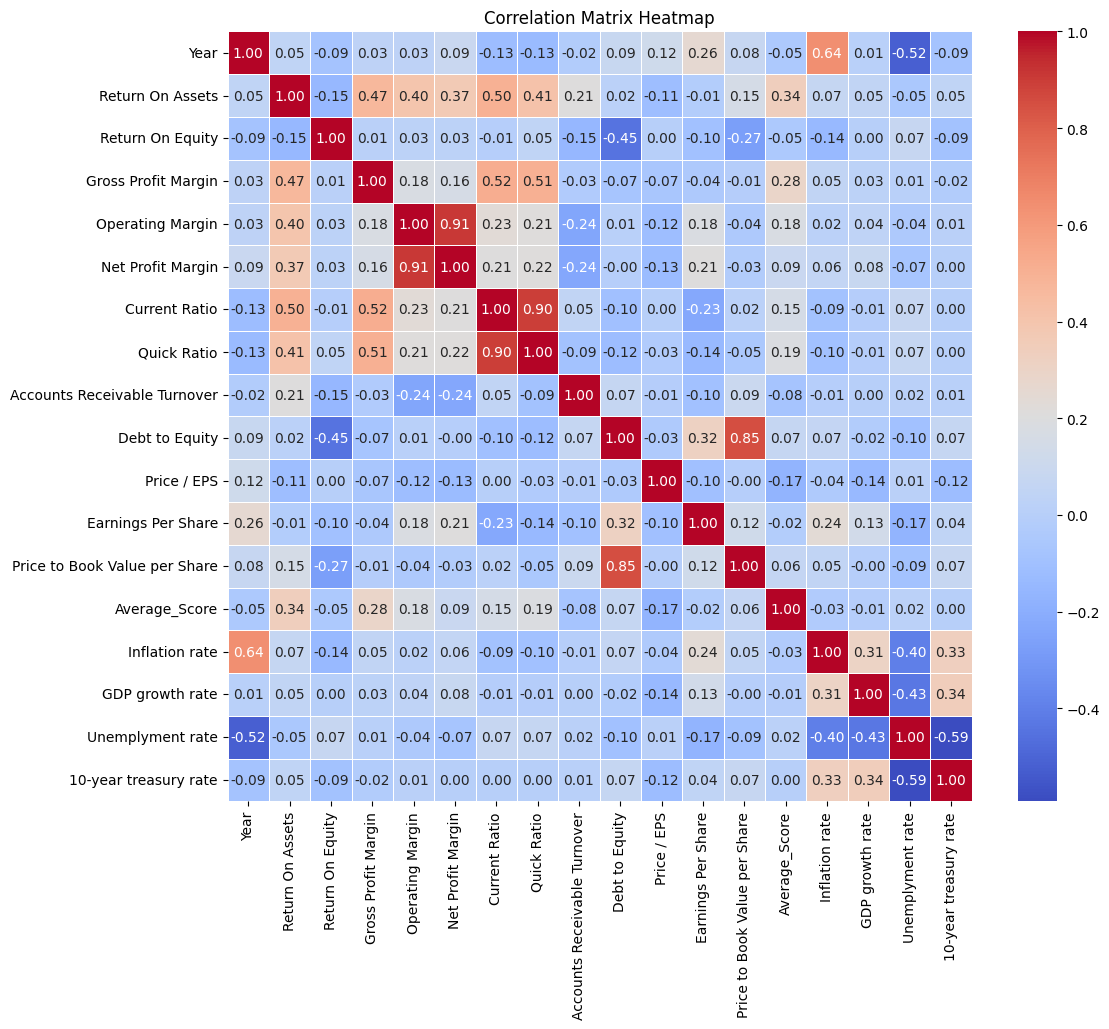

In [70]:
# Calculate the correlation matrix for the 'merged_df' dataframe.
# This matrix will contain the Pearson correlation coefficients between each pair of columns in the dataframe.
correlation_matrix = merged_df.corr()

# Initialize a new figure with specified dimensions (12 units wide by 10 units tall) for plotting.
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn's heatmap function to visualize the correlation matrix.
# 'annot=True' means that the correlation values will be displayed on the heatmap.
# 'cmap='coolwarm'' specifies the color palette to be used, where negative correlations are cool (blue) and positive correlations are warm (red).
# 'fmt=".2f"' formats the annotation to display only two decimal places.
# 'linewidths=.5' specifies the width of the lines that will separate each cell.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title of the plot to indicate it's a heatmap of the correlation matrix.
plt.title('Correlation Matrix Heatmap')

# Display the plot.
plt.show()

In [71]:
print(correlation_matrix)

                                   Year  Return On Assets  Return On Equity   
Year                           1.000000          0.047526         -0.086978  \
Return On Assets               0.047526          1.000000         -0.149502   
Return On Equity              -0.086978         -0.149502          1.000000   
Gross Profit Margin            0.030885          0.466441          0.013718   
Operating Margin               0.031132          0.401355          0.028029   
Net Profit Margin              0.088292          0.369763          0.025424   
Current Ratio                 -0.125602          0.496519         -0.005521   
Quick Ratio                   -0.133669          0.411303          0.045950   
Accounts Receivable Turnover  -0.024647          0.209239         -0.152473   
Debt to Equity                 0.085190          0.019157         -0.445120   
Price / EPS                    0.122014         -0.113718          0.002612   
Earnings Per Share             0.257631         -0.0

In [54]:
# Step 4: Encoding Categorical Variables
df_company = pd.get_dummies(merged_df['Company Name'], prefix='Company')
merged_df = pd.concat([merged_df, df_company], axis=1)

## Splitting the Data in Test Train for Modelling Lasso Regression

In [15]:
# Step 5: Split Data into Training and Test Sets
X = merged_df.drop('Return On Assets', axis=1)  # Replace 'Your_Target_Variable' with the column you are trying to predict
y = merged_df['Return On Assets']  # The column you are trying to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Step 7: Create and Train the Lasso Regression Model
lasso = Lasso(alpha=1.0)  # You can change alpha to fine-tune your model
lasso.fit(X_train_scaled, y_train)

Lasso()

In [18]:
# Step 8: Make Predictions and Evaluate the Model
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0037352801082185497


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for alpha
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize a GridSearchCV object to perform the hyperparameter tuning
# We'll use 5-fold cross-validation
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)

# Fit the GridSearchCV object to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

# Output the best alpha value
print(f"The best alpha value is: {best_alpha}")

# You can now initialize a new Lasso model with this alpha value and fit it to the data
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train_scaled, y_train)

# Check the new coefficients
print("Lasso coefficients with best alpha:", best_lasso.coef_)

# Make predictions on the test set and calculate the new MSE
y_pred_best_lasso = best_lasso.predict(X_test_scaled)
mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
print(f"Mean Squared Error with best alpha: {mse_best_lasso}")

The best alpha value is: 0.001
Lasso coefficients with best alpha: [ 0.         -0.00081739  0.0009208   0.0227776   0.00866942  0.
 -0.          0.0038018   0.         -0.00176399  0.00613973  0.0024375
  0.00513408  0.00039898 -0.         -0.          0.00056708  0.0048676
 -0.01289232 -0.00453503  0.01156902 -0.00515273 -0.00350947  0.00011503
  0.         -0.00114268 -0.00589834 -0.01954977  0.01542085  0.
  0.00104377 -0.         -0.02465856  0.00349001  0.00070339  0.00178152
  0.00134583  0.0119726   0.00065073 -0.         -0.01075666  0.
 -0.00677877 -0.00506671  0.00092936 -0.         -0.00211892]
Mean Squared Error with best alpha: 0.0004578864753800897


In [20]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from sklearn.metrics import r2_score

# Calculate the R-squared value for the Lasso model with the best alpha
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)
print(f"R-squared value with best alpha: {r2_best_lasso}")

R-squared value with best alpha: 0.870234861949229


In [22]:
# Pair the feature names with the coefficients
feature_coef_pairs = list(zip(X.columns, best_lasso.coef_))

# Convert to a DataFrame for better visualization
import pandas as pd

feature_coef_df = pd.DataFrame(feature_coef_pairs, columns=['Feature', 'Coefficient'])

# Sort the DataFrame by the absolute value of the coefficients
feature_coef_df['abs_coef'] = feature_coef_df['Coefficient'].abs()
feature_coef_df = feature_coef_df.sort_values(by='abs_coef', ascending=False).drop(columns=['abs_coef'])

print("Feature-Coefficient Pairs:")
print(feature_coef_df)

Feature-Coefficient Pairs:
                                         Feature  Coefficient
32                   Company_JPMorgan Chase & Co    -0.024659
3                               Operating Margin     0.022778
27               Company_Goldman Sachs Group Inc    -0.019550
28                        Company_Home Depot Inc     0.015421
18                   Company_American Express Co    -0.012892
37                              Company_Nike Inc     0.011973
20                             Company_Apple Inc     0.011569
40               Company_Travelers Companies Inc    -0.010757
4                              Net Profit Margin     0.008669
42            Company_Verizon Communications Inc    -0.006779
10                            Earnings Per Share     0.006140
26                               Company_Dow Inc    -0.005898
21                             Company_Boeing Co    -0.005153
12                                 Average_Score     0.005134
43                              Company_Vis

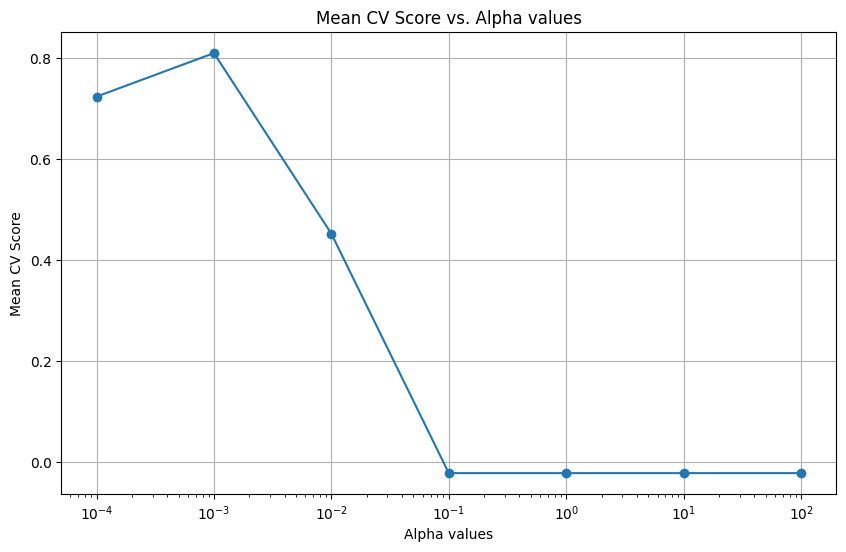

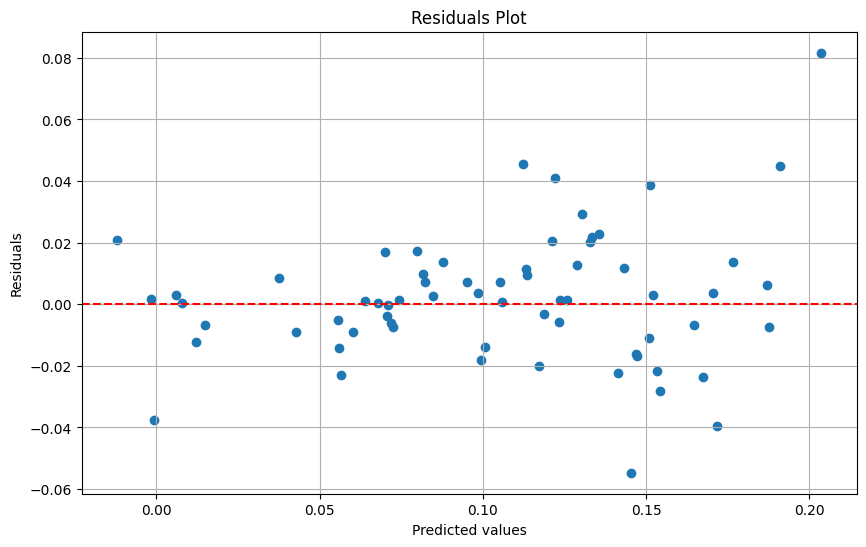

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import lasso_path

# 1. Cross-validation scores vs. Alpha values
mean_scores = grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(10,6))
plt.semilogx(param_grid['alpha'], mean_scores, marker='o')
plt.xlabel('Alpha values')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs. Alpha values')
plt.grid(True)
plt.show()

# 3. Residuals Plot
residuals = y_test - y_pred_best_lasso
plt.figure(figsize=(10,6))
plt.scatter(y_pred_best_lasso, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()


In [24]:
from sklearn.metrics import r2_score
import seaborn as sns

# 1. Basic Summary
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Best CV Score: {grid_search.best_score_}\n")

# 2. Model Coefficients
non_zero_coeffs = np.sum(best_lasso.coef_ != 0)
print(f"Number of features retained: {non_zero_coeffs}")
print(f"Number of features eliminated: {len(best_lasso.coef_) - non_zero_coeffs}\n")

# 3. Performance on Test Set
print(f"Mean Squared Error: {mse_best_lasso}")
print(f"R-squared: {r2_score(y_test, y_pred_best_lasso)}")
print(f"Root Mean Squared Error: {np.sqrt(mse_best_lasso)}\n")

# 5. Cross-Validation Results
print("\nCross-Validation Scores:")
for alpha, score in zip(param_grid['alpha'], mean_scores):
    print(f"Alpha: {alpha}, Mean CV Score: {score}")


Best Alpha: 0.001
Best CV Score: 0.8097537905841803

Number of features retained: 35
Number of features eliminated: 12

Mean Squared Error: 0.0004578864753800897
R-squared: 0.870234861949229
Root Mean Squared Error: 0.021398282066093288


Cross-Validation Scores:
Alpha: 0.0001, Mean CV Score: 0.7236495708288414
Alpha: 0.001, Mean CV Score: 0.8097537905841803
Alpha: 0.01, Mean CV Score: 0.45237751133842463
Alpha: 0.1, Mean CV Score: -0.021565997800508763
Alpha: 1, Mean CV Score: -0.021565997800508763
Alpha: 10, Mean CV Score: -0.021565997800508763
Alpha: 100, Mean CV Score: -0.021565997800508763


In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [26]:
# Initialize Ridge Regression with default parameters
ridge_base = Ridge()

# Fit the model
ridge_base.fit(X_train_scaled, y_train)

# Make predictions
y_pred_base = ridge_base.predict(X_test_scaled)

# Calculate Mean Squared Error
mse_base = mean_squared_error(y_test, y_pred_base)
print(f"Mean Squared Error with base model: {mse_base}")


Mean Squared Error with base model: 0.0004674070217342136


In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for alpha
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize a GridSearchCV object to perform the hyperparameter tuning
# We'll use 5-fold cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)

# Fit the GridSearchCV object to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

# Output the best alpha value
print(f"The best alpha value is: {best_alpha}")

# You can now initialize a new Ridge model with this alpha value and fit it to the data
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

# Check the new coefficients
print("Ridge coefficients with best alpha:", best_ridge.coef_)

# Make predictions on the test set and calculate the new MSE
y_pred_best_ridge = best_ridge.predict(X_test_scaled)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
print(f"Mean Squared Error with best alpha: {mse_best_ridge}")


The best alpha value is: 10
Ridge coefficients with best alpha: [ 0.00163706 -0.00159195  0.0001402   0.02054852  0.0094517   0.00333387
 -0.00677564  0.0107121  -0.00242182 -0.00273571  0.00852487  0.00508834
  0.00949773 -0.00029351 -0.00071919  0.00212764  0.00299196  0.00758833
 -0.01092628 -0.0019444   0.01390027 -0.00570806 -0.00190927  0.00528342
  0.00378261 -0.00038754 -0.00445576 -0.01899139  0.01303023  0.00317822
  0.00363003  0.00090304 -0.02148419  0.00738315  0.00342685  0.0046123
  0.00487814  0.01430861  0.00307905  0.00078406 -0.01008071  0.00064919
 -0.0049484  -0.00478755  0.00193118 -0.00454523 -0.00088316]
Mean Squared Error with best alpha: 0.00041668583122859087


In [29]:
from sklearn.metrics import r2_score

# Calculate the R-squared value for the Ridge model with the best alpha
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)
print(f"R-squared value with best alpha: {r2_best_ridge}")

R-squared value with best alpha: 0.8819111344830748


The best alpha value for Ridge is: 10


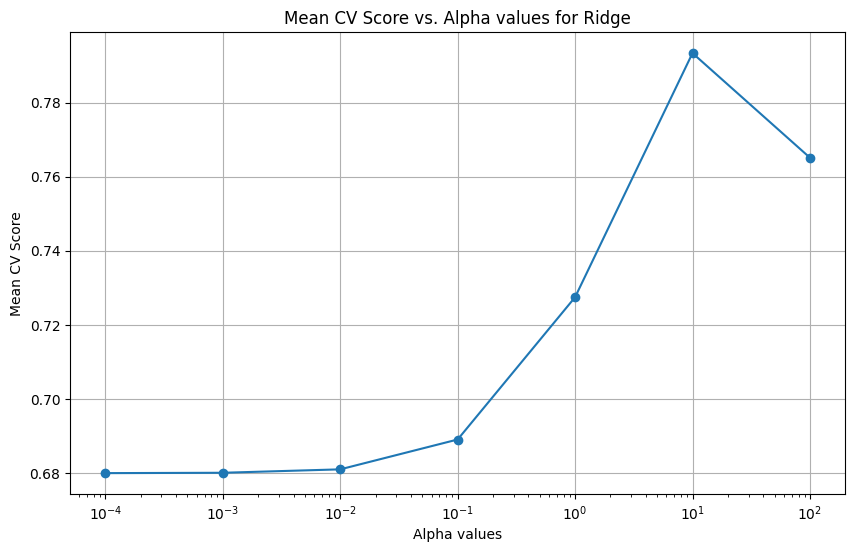

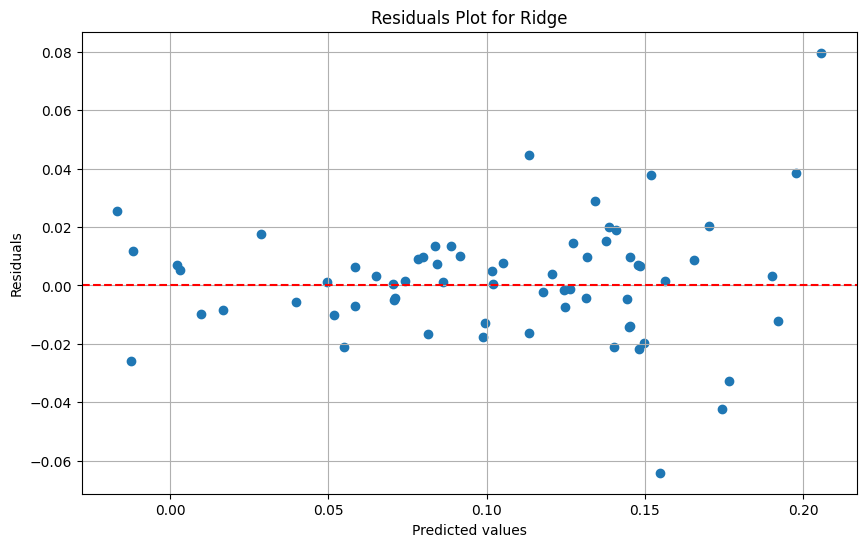

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Initialize a GridSearchCV object to perform the hyperparameter tuning for Ridge
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5)

# Fit the GridSearchCV object to the scaled training data
grid_search_ridge.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

# Output the best alpha value
print(f"The best alpha value for Ridge is: {best_alpha_ridge}")

# Initialize a new Ridge model with this alpha value and fit it to the data
best_ridge = Ridge(alpha=best_alpha_ridge)
best_ridge.fit(X_train_scaled, y_train)

# Make predictions on the test set and calculate the new MSE
y_pred_best_ridge = best_ridge.predict(X_test_scaled)

# 1. Cross-validation scores vs. Alpha values
mean_scores_ridge = grid_search_ridge.cv_results_['mean_test_score']
plt.figure(figsize=(10,6))
plt.semilogx(param_grid['alpha'], mean_scores_ridge, marker='o')
plt.xlabel('Alpha values')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs. Alpha values for Ridge')
plt.grid(True)
plt.show()

# 2. Residuals Plot
residuals_ridge = y_test - y_pred_best_ridge
plt.figure(figsize=(10,6))
plt.scatter(y_pred_best_ridge, residuals_ridge)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Ridge')
plt.grid(True)
plt.show()


In [34]:
# Pair the feature names with the coefficients
feature_coef_pairs = list(zip(X.columns, best_ridge.coef_))  # Replace 'best_lasso' with 'best_ridge'

# Convert to a DataFrame for better visualization
import pandas as pd

feature_coef_df = pd.DataFrame(feature_coef_pairs, columns=['Feature', 'Coefficient'])

# Sort the DataFrame by the absolute value of the coefficients
feature_coef_df['abs_coef'] = feature_coef_df['Coefficient'].abs()
feature_coef_df = feature_coef_df.sort_values(by='abs_coef', ascending=False).drop(columns=['abs_coef'])

print("Feature-Coefficient Pairs:")
print(feature_coef_df)

Feature-Coefficient Pairs:
                                         Feature  Coefficient
32                   Company_JPMorgan Chase & Co    -0.021484
3                               Operating Margin     0.020549
27               Company_Goldman Sachs Group Inc    -0.018991
37                              Company_Nike Inc     0.014309
20                             Company_Apple Inc     0.013900
28                        Company_Home Depot Inc     0.013030
18                   Company_American Express Co    -0.010926
7                   Accounts Receivable Turnover     0.010712
40               Company_Travelers Companies Inc    -0.010081
12                                 Average_Score     0.009498
4                              Net Profit Margin     0.009452
10                            Earnings Per Share     0.008525
17                                 Company_3M Co     0.007588
33                     Company_Johnson & Johnson     0.007383
6                                    Quick 

In [39]:
from sklearn.metrics import r2_score

# 1. Basic Summary for Ridge
print(f"Best Alpha for Ridge: {best_alpha}")
print(f"Best CV Score for Ridge: {grid_search.best_score_}\n")

# 2. Model Coefficients for Ridge
non_zero_coeffs_ridge = np.sum(best_ridge.coef_ != 0)
print(f"Number of features retained by Ridge: {non_zero_coeffs_ridge}")
print(f"Number of features eliminated by Ridge: {len(best_ridge.coef_) - non_zero_coeffs_ridge}\n")

# 3. Performance on Test Set for Ridge
print(f"Mean Squared Error for Ridge: {mse_best_ridge}")
print(f"R-squared for Ridge: {r2_score(y_test, y_pred_best_ridge)}")
print(f"Root Mean Squared Error for Ridge: {np.sqrt(mse_best_ridge)}\n")

# 5. Cross-Validation Results for Ridge
mean_scores_ridge = grid_search.cv_results_['mean_test_score']
print("\nCross-Validation Scores for Ridge:")
for alpha, score in zip(param_grid['alpha'], mean_scores_ridge):
    print(f"Alpha: {alpha}, Mean CV Score: {score}")


Best Alpha for Ridge: 10
Best CV Score for Ridge: 0.7933770809102711

Number of features retained by Ridge: 47
Number of features eliminated by Ridge: 0

Mean Squared Error for Ridge: 0.00041668583122859087
R-squared for Ridge: 0.8819111344830748
Root Mean Squared Error for Ridge: 0.020412883951773958


Cross-Validation Scores for Ridge:
Alpha: 0.0001, Mean CV Score: 0.6799612229322344
Alpha: 0.001, Mean CV Score: 0.6800550967212857
Alpha: 0.01, Mean CV Score: 0.6809797160703637
Alpha: 0.1, Mean CV Score: 0.6890402666189369
Alpha: 1, Mean CV Score: 0.727463577304858
Alpha: 10, Mean CV Score: 0.7933770809102711
Alpha: 100, Mean CV Score: 0.7651401410177188


In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Initialize a base ElasticNet model
base_en = ElasticNet()
base_en.fit(X_train_scaled, y_train)

# Make predictions on the test set and calculate the MSE for the base model
y_pred_base_en = base_en.predict(X_test_scaled)
mse_base_en = mean_squared_error(y_test, y_pred_base_en)
print(f"Mean Squared Error with base model: {mse_base_en}")

# Define the parameter grid for alpha and l1_ratio
param_grid_en = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# Initialize a GridSearchCV object to perform the hyperparameter tuning
# We'll use 5-fold cross-validation
grid_search_en = GridSearchCV(ElasticNet(), param_grid_en, cv=5)

# Fit the GridSearchCV object to the scaled training data
grid_search_en.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params_en = grid_search_en.best_params_
best_alpha_en = best_params_en['alpha']
best_l1_ratio_en = best_params_en['l1_ratio']

# Output the best parameters
print(f"The best parameters for Elastic Net are: alpha = {best_alpha_en}, l1_ratio = {best_l1_ratio_en}")

# Initialize a new ElasticNet model with the best parameters and fit it to the data
best_en = ElasticNet(alpha=best_alpha_en, l1_ratio=best_l1_ratio_en)
best_en.fit(X_train_scaled, y_train)

# Make predictions on the test set and calculate the new MSE
y_pred_best_en = best_en.predict(X_test_scaled)
mse_best_en = mean_squared_error(y_test, y_pred_best_en)
print(f"Mean Squared Error with best parameters: {mse_best_en}")

# Compare base and best models
print(f"Base model MSE: {mse_base_en}, Best model MSE: {mse_best_en}")

Mean Squared Error with base model: 0.0037352801082185497


c:\Users\Sumit Mehta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.032e-04, tolerance: 7.204e-05
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sumit Mehta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.347e-04, tolerance: 7.484e-05
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sumit Mehta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

The best parameters for Elastic Net are: alpha = 0.001, l1_ratio = 0.9
Mean Squared Error with best parameters: 0.00045156056175062285
Base model MSE: 0.0037352801082185497, Best model MSE: 0.00045156056175062285


In [32]:
from sklearn.metrics import r2_score

# Calculate the R-squared value for the base Elastic Net model
r2_base_en = r2_score(y_test, y_pred_base_en)
print(f"R-squared value with base model: {r2_base_en}")

# Calculate the R-squared value for the Elastic Net model with the best parameters
r2_best_en = r2_score(y_test, y_pred_best_en)
print(f"R-squared value with best parameters: {r2_best_en}")

R-squared value with base model: -0.05857928758197861
R-squared value with best parameters: 0.8720276274043424


In [37]:
# Create a list of pairs (tuples) where each pair consists of a feature name from 'X.columns' and its corresponding coefficient from 'best_en.coef_'.
feature_coef_pairs = list(zip(X.columns, best_en.coef_))

# Convert the list of pairs into a DataFrame with two columns: 'Feature' and 'Coefficient'.
feature_coef_df = pd.DataFrame(feature_coef_pairs, columns=['Feature', 'Coefficient'])

# Create a new column 'abs_coef' in the DataFrame that contains the absolute values of the coefficients.
# This is done to sort the features based on the magnitude of their coefficients, regardless of their sign (positive or negative).
feature_coef_df['abs_coef'] = feature_coef_df['Coefficient'].abs()

# Sort the DataFrame based on the 'abs_coef' column in descending order (i.e., features with the highest magnitude coefficients come first).
# After sorting, drop the 'abs_coef' column as it's no longer needed.
feature_coef_df = feature_coef_df.sort_values(by='abs_coef', ascending=False).drop(columns=['abs_coef'])

# Print the sorted DataFrame to display the feature-coefficient pairs.
print("Feature-Coefficient Pairs:")
print(feature_coef_df)

Feature-Coefficient Pairs:
                                         Feature  Coefficient
32                   Company_JPMorgan Chase & Co    -0.024973
3                               Operating Margin     0.023616
27               Company_Goldman Sachs Group Inc    -0.019931
28                        Company_Home Depot Inc     0.015390
18                   Company_American Express Co    -0.013220
37                              Company_Nike Inc     0.012081
20                             Company_Apple Inc     0.011486
40               Company_Travelers Companies Inc    -0.011012
4                              Net Profit Margin     0.008440
42            Company_Verizon Communications Inc    -0.006957
10                            Earnings Per Share     0.006254
26                               Company_Dow Inc    -0.006027
43                              Company_Visa Inc    -0.005564
12                                 Average_Score     0.005484
21                             Company_Boei

In [40]:
from sklearn.metrics import r2_score

# 1. Basic Summary for ElasticNet
print(f"Best Parameters for ElasticNet: Alpha = {best_alpha_en}, L1 Ratio = {best_l1_ratio_en}")
print(f"Best CV Score for ElasticNet: {grid_search_en.best_score_}\n")

# 2. Model Coefficients for ElasticNet
non_zero_coeffs_en = np.sum(best_en.coef_ != 0)
print(f"Number of features retained by ElasticNet: {non_zero_coeffs_en}")
print(f"Number of features eliminated by ElasticNet: {len(best_en.coef_) - non_zero_coeffs_en}\n")

# 3. Performance on Test Set for ElasticNet
print(f"Mean Squared Error for ElasticNet: {mse_best_en}")
print(f"R-squared for ElasticNet: {r2_score(y_test, y_pred_best_en)}")
print(f"Root Mean Squared Error for ElasticNet: {np.sqrt(mse_best_en)}\n")

# 5. Cross-Validation Results for ElasticNet
mean_scores_en = grid_search_en.cv_results_['mean_test_score']
print("\nCross-Validation Scores for ElasticNet:")
for params, score in zip(grid_search_en.cv_results_['params'], mean_scores_en):
    print(f"Parameters: {params}, Mean CV Score: {score}")


Best Parameters for ElasticNet: Alpha = 0.001, L1 Ratio = 0.9
Best CV Score for ElasticNet: 0.8101931910320952

Number of features retained by ElasticNet: 36
Number of features eliminated by ElasticNet: 11

Mean Squared Error for ElasticNet: 0.00045156056175062285
R-squared for ElasticNet: 0.8720276274043424
Root Mean Squared Error for ElasticNet: 0.021249954394083365


Cross-Validation Scores for ElasticNet:
Parameters: {'alpha': 0.0001, 'l1_ratio': 0.1}, Mean CV Score: 0.6864872318900661
Parameters: {'alpha': 0.0001, 'l1_ratio': 0.3}, Mean CV Score: 0.6943824300144258
Parameters: {'alpha': 0.0001, 'l1_ratio': 0.5}, Mean CV Score: 0.7045344624857921
Parameters: {'alpha': 0.0001, 'l1_ratio': 0.7}, Mean CV Score: 0.7133619635448382
Parameters: {'alpha': 0.0001, 'l1_ratio': 0.9}, Mean CV Score: 0.7204246439721873
Parameters: {'alpha': 0.001, 'l1_ratio': 0.1}, Mean CV Score: 0.7295657026155833
Parameters: {'alpha': 0.001, 'l1_ratio': 0.3}, Mean CV Score: 0.7739059522444631
Parameters: {'a